# MonReader - Computer Vision

<hr style="height:2px;border-width:10;color:blue;background-color:black">

<b>MonReader is a new mobile document digitization experience for the blind, for researchers and for everyone else in need for fully automatic, highly fast and high-quality document scanning in bulk. It is composed of a mobile app and all the user needs to do is flip pages and everything is handled by MonReader: it detects page flips from low-resolution camera preview and takes a high-resolution picture of the document, recognizing its corners and crops it accordingly, and it dewarps the cropped document to obtain a bird's eye view, sharpens the contrast between the text and the background and finally recognizes the text with formatting kept intact, being further corrected by MonReader's ML powered redactor.</b>

<img src="project_10_2.jpg" style="width:40%;height:450px"/> 

# 

<b>Goal(s):</b>

Predict if the page is being flipped using a single image.


Predict if a given sequence of images contains an action of flipping.

# 

Importing necessary libraries.

In [5]:
import os
import cv2
import random
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (Flatten, Dense, Activation, MaxPooling2D, Conv2D, InputLayer)



import warnings
warnings.filterwarnings('ignore')


### Viewing images from a folder.

In [1]:
imdir = 'C:/Users/Administrator/Desktop/images/training/flip/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

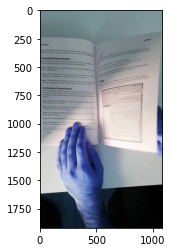

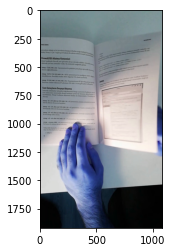

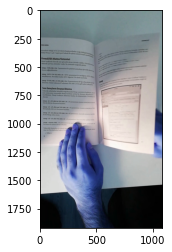

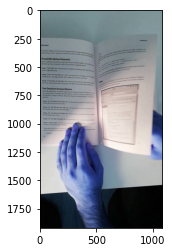

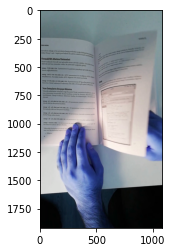

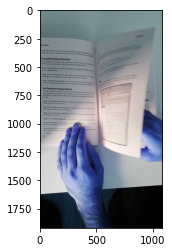

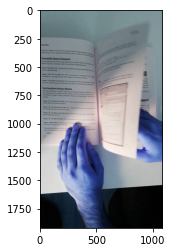

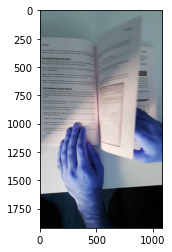

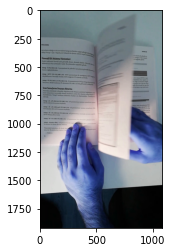

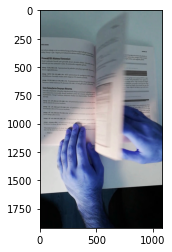

In [2]:
import matplotlib.pyplot as plt
for im in images[:10]:
    plt.figure()
    plt.imshow(im)

In [48]:
data_dir = pathlib.Path(directory)

In [49]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2392


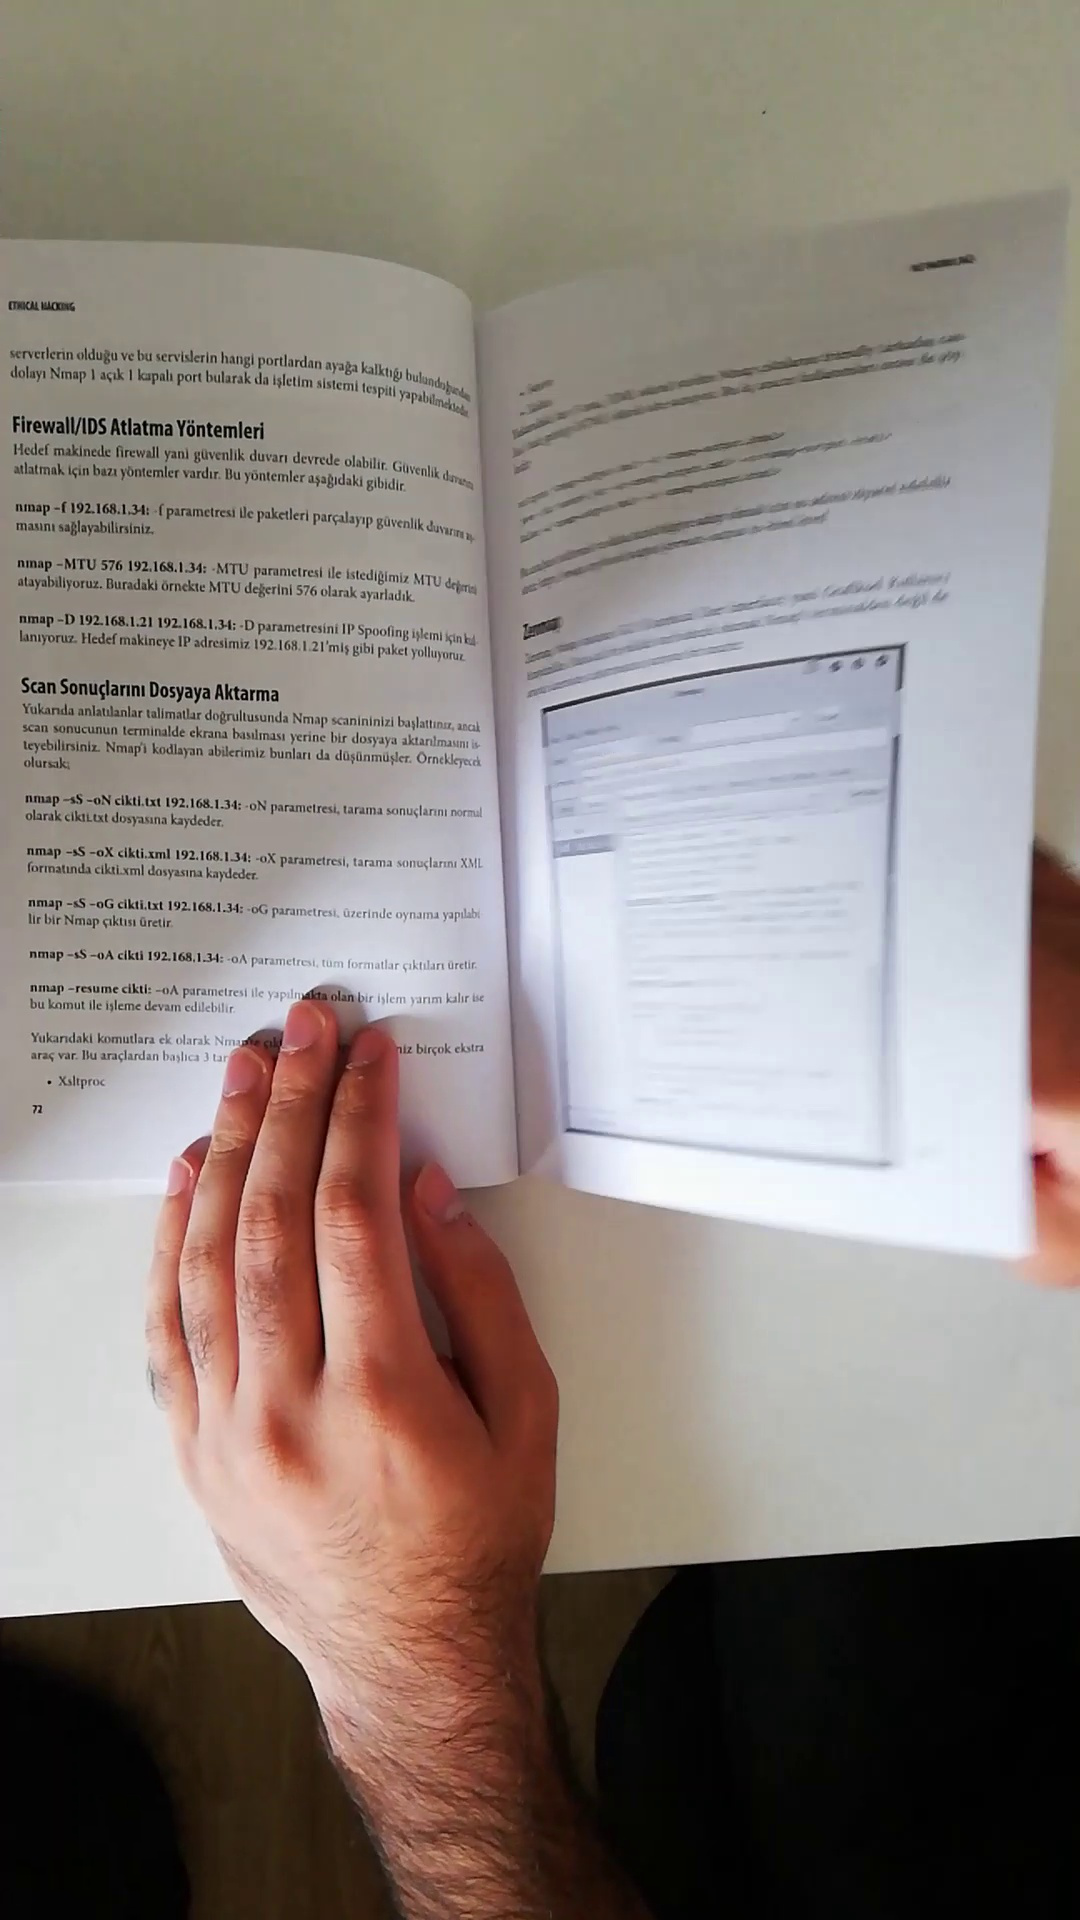

In [51]:
flip = list(data_dir.glob('flip/*'))
PIL.Image.open(str(flip[0]))

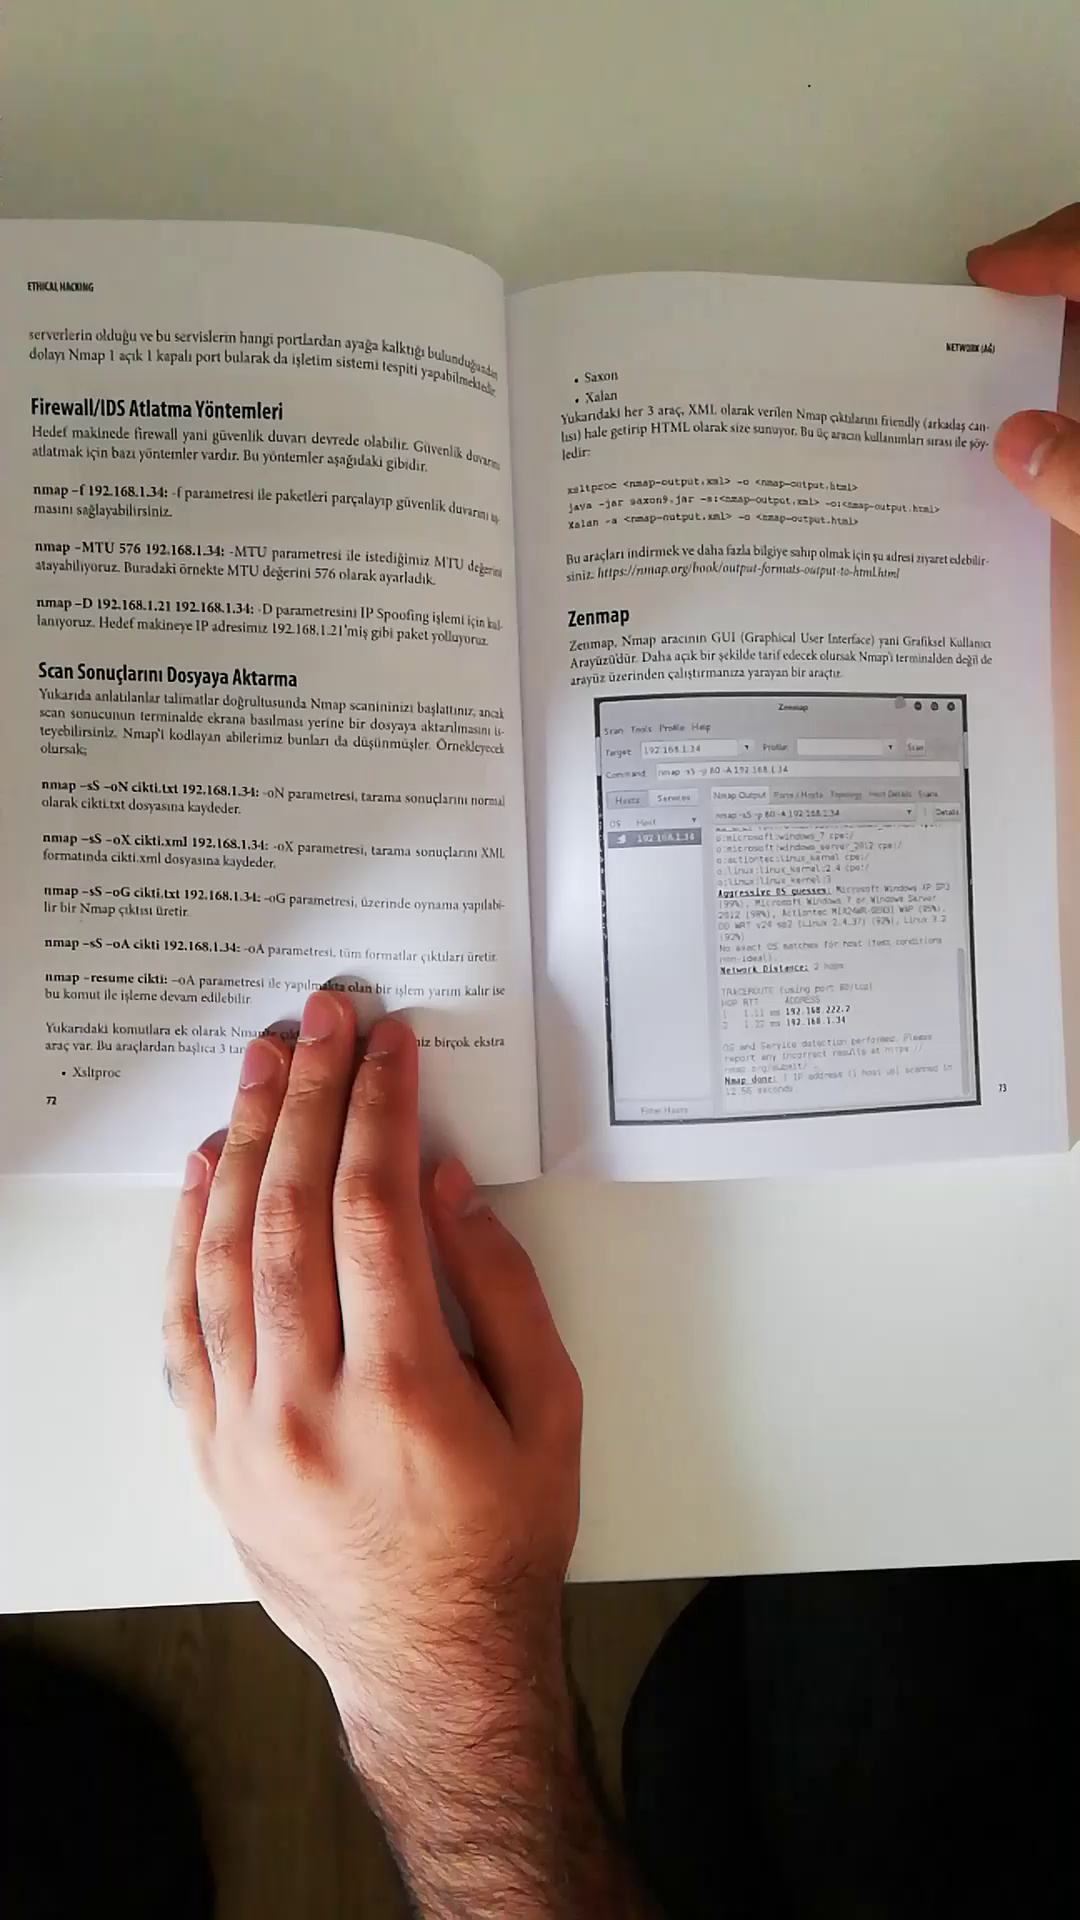

In [52]:
notflip = list(data_dir.glob('notflip/*'))
PIL.Image.open(str(notflip[0]))

## Images Preprocessing for Computer Vision TensorFlow Module.

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
directorytrain = 'C:/Users/Administrator/Desktop/images/training/'

In [8]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directorytrain,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2392 files belonging to 2 classes.
Using 1914 files for training.


In [9]:
directorytest = 'C:/Users/Administrator/Desktop/images/testing/'

In [10]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directorytest,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 597 files belonging to 2 classes.


In [11]:
class_names = train_ds.class_names
print(class_names)

['flip', 'notflip']


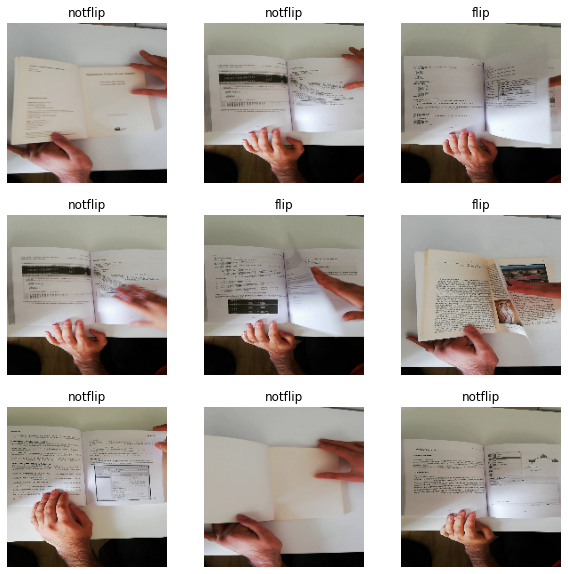

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training a model. If a dataset is too large to fit into memory, I use this method to create a performant on-disk cache.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import os
import PIL

<b>Standardize the data.</b>

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general, input values should  be small.

Here, I will standardize values to be in the [0, 1] range by using a Rescaling layer. 

layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),


### Create the model

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a relu activation function.

In [14]:
num_classes = 2

model = Sequential([
  
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),    
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model.

In [20]:
epochs=10
history = model.fit(
  train_ds,   
  epochs=epochs
)

Epoch 1/10
60/60 [==============================] - 52s 865ms/step - loss: 0.0411 - accuracy: 0.9869
Epoch 2/10
60/60 [==============================] - 50s 828ms/step - loss: 0.0285 - accuracy: 0.9896
Epoch 3/10
60/60 [==============================] - 49s 821ms/step - loss: 0.0215 - accuracy: 0.9927
Epoch 4/10
60/60 [==============================] - 51s 842ms/step - loss: 0.0448 - accuracy: 0.9875
Epoch 5/10
60/60 [==============================] - 52s 859ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 6/10
60/60 [==============================] - 49s 816ms/step - loss: 0.0129 - accuracy: 0.9948
Epoch 7/10
60/60 [==============================] - 48s 805ms/step - loss: 0.0187 - accuracy: 0.9922
Epoch 8/10
60/60 [==============================] - 48s 807ms/step - loss: 0.0409 - accuracy: 0.9854
Epoch 9/10
60/60 [==============================] - 48s 795ms/step - loss: 0.0158 - accuracy: 0.9932
Epoch 10/10
60/60 [==============================] - 48s 801ms/step - loss: 0.0060 - accura

### Visualize training results.

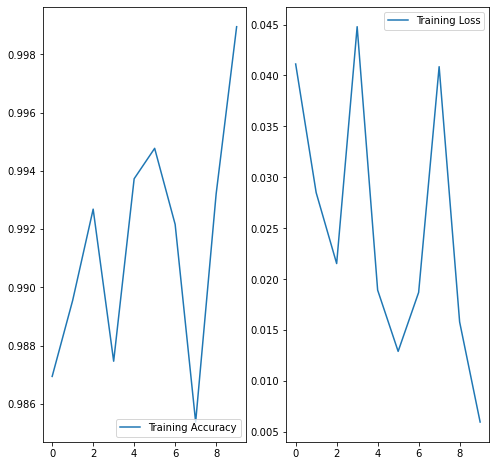

In [21]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')

plt.show()

Let's look at what went wrong and try to increase the overall performance of the model.

<b>Overfitting</b>

There are multiple ways to fight overfitting in the training process. I'll use data augmentation and add Dropout.

<b>Data augmentation</b>
    
Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.



In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:

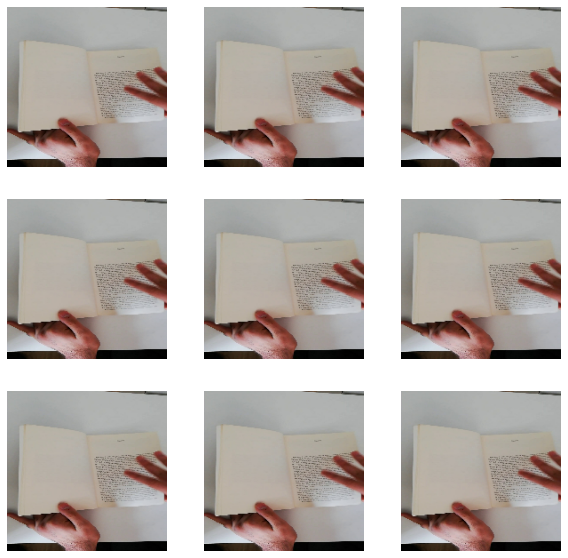

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Compile and train the model.

Train set:

In [24]:
num_classes = 2
modeltrain = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Test set:

In [25]:
num_classes = 2
modeltest = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
modeltrain.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
modeltest.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
modeltrain.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

In [29]:
epochs = 15
trainhistory = modeltrain.fit(
  train_ds,
  epochs=epochs
)

Epoch 1/15
60/60 [==============================] - 56s 901ms/step - loss: 0.7962 - accuracy: 0.5167
Epoch 2/15
60/60 [==============================] - 53s 886ms/step - loss: 0.6855 - accuracy: 0.5439
Epoch 3/15
60/60 [==============================] - 53s 875ms/step - loss: 0.6424 - accuracy: 0.6400
Epoch 4/15
60/60 [==============================] - 76s 1s/step - loss: 0.5908 - accuracy: 0.7043
Epoch 5/15
60/60 [==============================] - 81s 1s/step - loss: 0.5089 - accuracy: 0.7701
Epoch 6/15
60/60 [==============================] - 81s 1s/step - loss: 0.4799 - accuracy: 0.7863
Epoch 7/15
60/60 [==============================] - 60s 1s/step - loss: 0.4422 - accuracy: 0.8051
Epoch 8/15
60/60 [==============================] - 55s 912ms/step - loss: 0.3844 - accuracy: 0.8391
Epoch 9/15
60/60 [==============================] - 86s 1s/step - loss: 0.3684 - accuracy: 0.8495
Epoch 10/15
60/60 [==============================] - 76s 1s/step - loss: 0.3521 - accuracy: 0.8527
Epoch 1

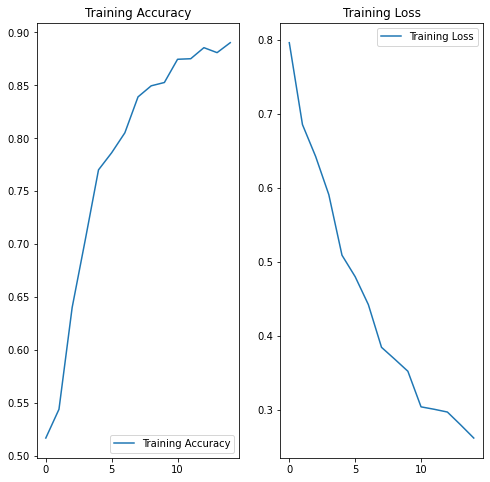

In [30]:
acc = trainhistory.history['accuracy']


loss = trainhistory.history['loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

After applying data augmentation and Dropout, there is less overfitting than before.

### Predict on new data.

Finally, let's use our model to classify an image that wasn't included in the training or validation sets.

In [29]:
epochs=50
testhistory = modeltest.fit(
  test_ds, 
  epochs=epochs
)

Epoch 1/50
19/19 [==============================] - 21s 936ms/step - loss: 1.6045 - accuracy: 0.5209
Epoch 2/50
19/19 [==============================] - 16s 830ms/step - loss: 0.6941 - accuracy: 0.4774
Epoch 3/50
19/19 [==============================] - 16s 818ms/step - loss: 0.6935 - accuracy: 0.4740
Epoch 4/50
19/19 [==============================] - 16s 855ms/step - loss: 0.6934 - accuracy: 0.4556
Epoch 5/50
19/19 [==============================] - 15s 813ms/step - loss: 0.6930 - accuracy: 0.4858
Epoch 6/50
19/19 [==============================] - 16s 816ms/step - loss: 0.6941 - accuracy: 0.5193
Epoch 7/50
19/19 [==============================] - 16s 817ms/step - loss: 0.6921 - accuracy: 0.5293
Epoch 8/50
19/19 [==============================] - 16s 821ms/step - loss: 0.6906 - accuracy: 0.5377
Epoch 9/50
19/19 [==============================] - 15s 813ms/step - loss: 0.6929 - accuracy: 0.5276
Epoch 10/50
19/19 [==============================] - 16s 836ms/step - loss: 0.6855 - accura

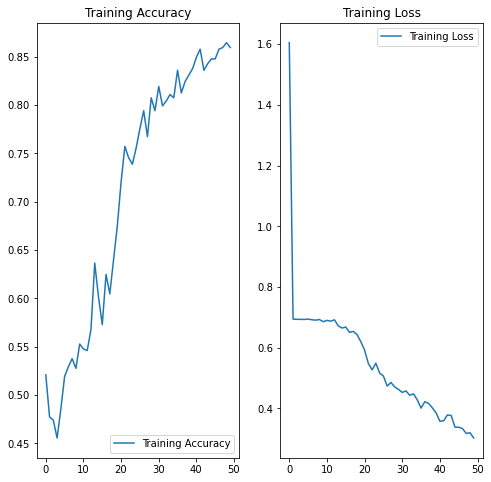

In [30]:
acc = testhistory.history['accuracy']


loss = testhistory.history['loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

This a test image I am gonna use to expose the model to tell the Neural Network what it thinks image is:

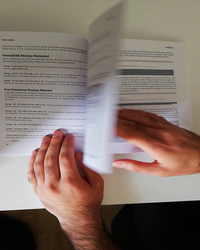

In [31]:
from PIL import Image
im = Image.open('C:/Users/Administrator/Desktop/testimage.jpg') # image extension *.png,*.jpg
new_width  = 200
new_height = 250
img = im.resize((new_width, new_height), Image.ANTIALIAS)
img


###  Results.

In [32]:
import pathlib
directory_url = "C:/Users/Administrator/Desktop/testimage.jpg"
imagepath = pathlib.Path(directory_url)

img = keras.preprocessing.image.load_img(
    imagepath, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modeltest.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to flip with a 86.41 percent confidence.


# Goal to predict if the page is being flipped using a single image is Done.

## Next Goal is to predict if a given sequence of images contains an action of flipping.

In [33]:
predtest = modeltest.predict(test_ds)


In [35]:
predtrain =  modeltrain.predict(train_ds)

In [312]:
predtest[:10]

array([[-15.01539   ,   2.5193996 ],
       [ -3.0566223 ,   0.24382262],
       [ -1.3357902 ,  -2.1717303 ],
       [ -4.5718236 ,   1.3549609 ],
       [  2.6634767 ,  -9.489815  ],
       [  5.408928  ,  -7.138578  ],
       [-18.752712  ,   0.07039689],
       [ -4.472476  ,   3.4053369 ],
       [  2.6908274 ,  -6.348079  ],
       [-17.699982  ,   1.8508964 ]], dtype=float32)

In [37]:
score = tf.nn.softmax(predtest)


In [38]:
score

<tf.Tensor: shape=(597, 2), dtype=float32, numpy=
array([[0.60812366, 0.39187634],
       [0.24657844, 0.7534216 ],
       [0.4355044 , 0.56449556],
       ...,
       [0.9893059 , 0.01069411],
       [0.02831391, 0.9716861 ],
       [0.05258633, 0.9474137 ]], dtype=float32)>

### Sample of images from a test folder and its  score predictions.

This image most likely belongs to flip with a 60.81 percent confidence.
This image most likely belongs to notflip with a 75.34 percent confidence.
This image most likely belongs to notflip with a 56.45 percent confidence.
This image most likely belongs to flip with a 99.54 percent confidence.
This image most likely belongs to notflip with a 84.07 percent confidence.
This image most likely belongs to flip with a 96.52 percent confidence.
This image most likely belongs to notflip with a 96.81 percent confidence.

<ipython-input-39-5fcfdd3b6144>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, j + 1)



This image most likely belongs to flip with a 57.48 percent confidence.
This image most likely belongs to notflip with a 50.82 percent confidence.


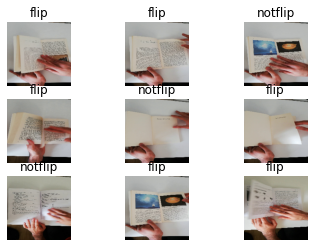

In [39]:
for i in score[:9]: 
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(i)], 100 * np.max(i)))
    for images, labels in test_ds.take(1):
        for j in range(9):
            ax = plt.subplot(3, 3, j + 1)
            plt.imshow(images[j].numpy().astype("uint8"))
            plt.title(class_names[labels[j]])
            plt.axis("off")
            

## Goal  to predict if a given sequence of images contains an action of flipping is Done.

# 

## Next goal is to train a model but  to use f1_score for performance evaluation.

In [1]:
def read_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = img[...,::-1]
        if img is not None:
            img = cv2.resize(img, dsize = (70,140), interpolation=cv2.INTER_CUBIC)
            y,h,x,w = 0,100,0,70
            img = img[y:y+h, x:x+w]
            img = img/255
            images.append(img)
            
    return images

In [4]:
train_notflip = read_images("images/training/notflip")
train_flip = read_images("images/training/flip")

In [5]:
test_notflip = read_images("images/testing/notflip")
test_flip = read_images("images/testing/flip")

In [6]:
X_noflip = np.array(train_notflip)
X_flip = np.array(train_flip)

In [7]:
y_noflip = np.zeros(X_noflip.shape[0])
y_flip = np.ones(X_flip.shape[0])

In [8]:
X = np.concatenate((X_noflip,X_flip ))
y = np.concatenate((y_noflip, y_flip))

X.shape, y.shape

((2392, 100, 70, 3), (2392,))

In [9]:
X_test_noflip = np.array(test_notflip)
X_test_flip = np.array(test_flip)
y_test_noflip = np.zeros(X_test_noflip.shape[0])
y_test_flip = np.ones(X_test_flip.shape[0])


X_test = np.concatenate((X_test_noflip,X_test_flip ))
y_test = np.concatenate((y_test_noflip, y_test_flip))
X_test.shape, y_test.shape

((597, 100, 70, 3), (597,))

In [26]:
from tensorflow.keras.layers import (Flatten, Dense, Activation, MaxPooling2D, Conv2D, InputLayer, Dropout)
batch_size = 64
epochs = 10
tmodel = Sequential()
tmodel.add(Conv2D(32, (2, 2), activation = "relu", padding = 'same', input_shape=(100, 70,3)))
tmodel.add(MaxPooling2D((2, 2))) 
tmodel.add(Dropout(0.2))
tmodel.add(Conv2D(32, (2, 2), activation = "relu", padding = 'same'))
tmodel.add(MaxPooling2D((2, 2)))
tmodel.add(Dropout(0.2))
tmodel.add(Flatten())
tmodel.add(Dense(128, activation="relu"))
tmodel.add(Dense(1, activation='sigmoid'))


In [27]:
tmodel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=tf.keras.metrics.AUC(name="auc"))

In [28]:
hist = tmodel.fit(X, y, batch_size= batch_size, epochs=epochs)

Epoch 1/10
38/38 [==============================] - 15s 350ms/step - loss: 0.8209 - auc: 0.5071
Epoch 2/10
38/38 [==============================] - 13s 337ms/step - loss: 0.6740 - auc: 0.6411
Epoch 3/10
38/38 [==============================] - 13s 353ms/step - loss: 0.6108 - auc: 0.7434
Epoch 4/10
38/38 [==============================] - 13s 345ms/step - loss: 0.5001 - auc: 0.8516
Epoch 5/10
38/38 [==============================] - 13s 347ms/step - loss: 0.3725 - auc: 0.9282
Epoch 6/10
38/38 [==============================] - 13s 349ms/step - loss: 0.2836 - auc: 0.9596
Epoch 7/10
38/38 [==============================] - 13s 344ms/step - loss: 0.2384 - auc: 0.9703
Epoch 8/10
38/38 [==============================] - 13s 334ms/step - loss: 0.2022 - auc: 0.9781
Epoch 9/10
38/38 [==============================] - 12s 323ms/step - loss: 0.1542 - auc: 0.9878
Epoch 10/10
38/38 [==============================] - 12s 326ms/step - loss: 0.1178 - auc: 0.9938


In [29]:
y_pred=tf.round(tmodel.predict(X_test))

In [30]:
train_pred=tf.round(tmodel.predict(X))

In [31]:
from sklearn.metrics import classification_report
target_names = ['flip', 'notflip']
print(classification_report(y, train_pred, target_names=target_names))

              precision    recall  f1-score   support

        flip       0.99      0.95      0.97      1230
     notflip       0.95      0.99      0.97      1162

    accuracy                           0.97      2392
   macro avg       0.97      0.97      0.97      2392
weighted avg       0.97      0.97      0.97      2392



In [32]:
target_names = ['flip', 'notflip']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        flip       0.98      0.93      0.95       307
     notflip       0.93      0.98      0.95       290

    accuracy                           0.95       597
   macro avg       0.95      0.95      0.95       597
weighted avg       0.95      0.95      0.95       597



# Conclusion:

Results are good. F1_score performed well. So the predictions will be perfect.But I had to restructure the data splitting it in X and Y. The baseline model using a single image did a good job as well. All the goals during the training are achieved.